In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import numpy as np
import duckietown_code_utils as dcu;
%matplotlib inline
%pylab inline

INFO:geometry:version: 2.0.5


Populating the interactive namespace from numpy and matplotlib


DEBUG:commons:version: 6.1.7 *
INFO:typing:version: 6.1.8
INFO:conf_tools:conf_tools 6.0.2


Populating the interactive namespace from numpy and matplotlib


# Implementation of Braitenberg agent

Now we know enough to implement our Braitenberg agent.


We will implement an agent of the form

```python
left_motor  = const + gain *  np.sum( LEFT * preprocess(image) )
right_motor = const + gain *  np.sum( RIGHT * preprocess(image) )
```

where `LEFT` and `RIGHT` are the weight matrices, while `const` and `gain` are two extra parameters for fine tuning.

You will have to implement the two functions `get_motor_left_matrix()` and `get_motor_right_matrix()` in the file [connections.py](connections.py). The file contains code that creates connections with some random values. Erase and put your own.

The other important code, which you need to **not** touch (at the beginning), is the file [agent.py](agent.py). This contains the rest of the Braitenberg agent, including all of the functionality (reading observations and create commands). The agent will load the `get_motor_left_matrix`, `get_motor_right_matrix` functions from the file [connections.py](connections.py).


We can also load the functions from this notebook:

In [2]:
from connections import get_motor_left_matrix, get_motor_right_matrix

We can visualize the functions above. As we said, the defaults do not make much sense, so not much interesting. But if you go and change the functions, then you will see more interesting results.

Note: you might need to reload the kernel for the notebook to detect the changes.

(480, 640)


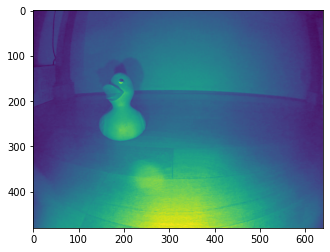

In [3]:
fn = '../samples/big-duck/big-duck-10.jpg'
image1 = dcu.rgb_from_jpg_fn(fn);
image1_gray = np.mean(image1, axis=2)
shape = image1_gray.shape
print(shape)
imshow(image1_gray)

The `shape` that was just printed above will be useful to you when you edit `connections.py`.

In [4]:
L = get_motor_left_matrix(shape)
R = get_motor_right_matrix(shape)

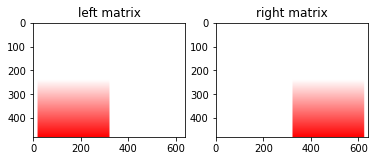

In [5]:
# visualizing left matrix

f = figure()
f.add_subplot(1, 2, 1)
imshow(dcu.posneg(L))
title('left matrix');
f.add_subplot(1, 2, 2)
imshow(dcu.posneg(R))
title('right matrix');

The following code will run the algorithm against some test images.

Note that it is not possible to really test such an algorithm on passive data. We need to run it!

Still, it is useful to see how your matrices are used. Notice that we simply multiply them with the preprocessed image
(the image that now only has non-zero pixel values where there are duckies). Then, we look at the sign of the result for
each matrix, and this is what decides which control values get sent to the motors.

Think of how to value your matrices
such that the sign of their multiplication's results is a good control rule for your motors.

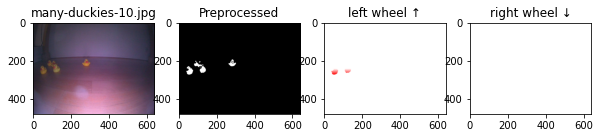

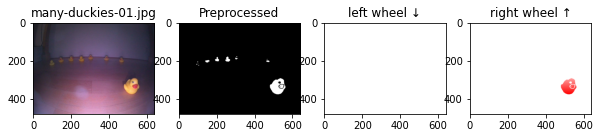

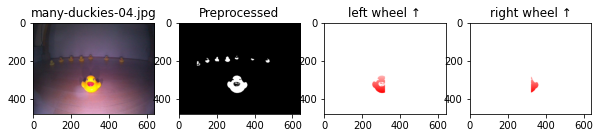

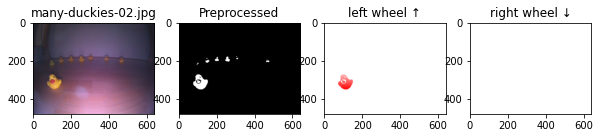

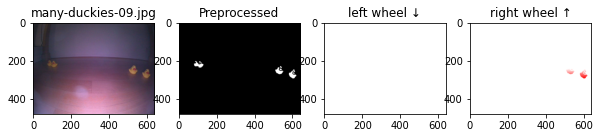

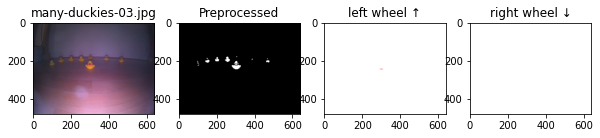

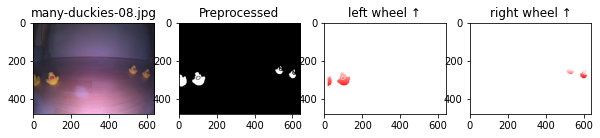

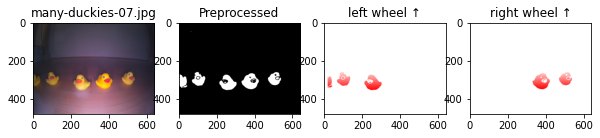

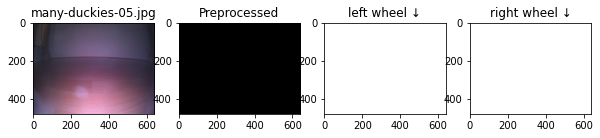

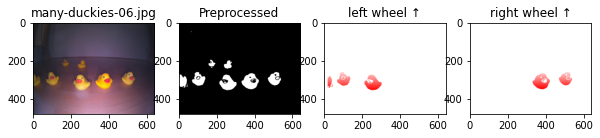

In [6]:
from matplotlib import pylab
import glob, os
from preprocessing import preprocess
dirname = '../samples/many-duckies'
images = glob.glob(f'{dirname}/*.jpg')

def rescale(a, L, U):
    if np.allclose(L, U):
        return 0.0
    return (a - L) / (U - L)


for a in images:
    im = dcu.rgb_from_jpg_fn(a)
    P = preprocess(im)
    Lim = P * L
    Rim = P * R
    Lsign = np.sum(Lim)
    Rsign = np.sum(Rim)
    f = pylab.figure(figsize=(10,2))
    f.add_subplot(1, 4, 1)
    imshow(im)
    pylab.title(os.path.basename(a))
    f.add_subplot(1, 4, 2)
    imshow(P, cmap='gray')
    pylab.title("Preprocessed")
    f.add_subplot(1, 4, 3)
    imshow(dcu.posneg(Lim))
    pylab.title('left wheel ' + ('↑' if Lsign > 0 else '↓'))
    f.add_subplot(1, 4, 4)
    imshow(dcu.posneg(Rim), cmap='bwr')
    pylab.title('right wheel ' + ('↑' if Rsign > 0 else '↓'))


Your agent is now ready to be tested according to the instructions in the [README](https://github.com/duckietown/mooc-exercises/blob/daffy/braitenberg/README.md).

Consider the agent that we gave you as a starting point - feel free to explore with different code also in [agent.py](agent.py).

Remember that to hand in the exercise, you will have to complete the final step in the instructions successfully (`dts challenges submit`).